
source :https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering#DATA-PREPROCESSING




In [ ]:
!gdown --id 1-RuvjxI3u6XelJrEAQArenZGn4V0SrW1

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-RuvjxI3u6XelJrEAQArenZGn4V0SrW1
To: /content/marketing_campaign.csv
100% 220k/220k [00:00<00:00, 101MB/s]


In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data= data.dropna()

In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

<ipython-input-37-b24e0576a709>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
<ipython-input-37-b24e0576a709>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


In [ ]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

<ipython-input-38-0cbbf70a7a31>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer_For"] = days
<ipython-input-38-0cbbf70a7a31>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")


In [ ]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

<ipython-input-39-303f36e226ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = 2021-data["Year_Birth"]
<ipython-input-39-303f36e226ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
<ipython-input-39-303f36e226ea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)



Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
def plot_result(X, centers, label, feature_names, dim1=0, dim2=1):
    plt.clf()
    plt.scatter(X[:, dim1], X[:, dim2], c=label, s=50, cmap='viridis')
    plt.scatter(centers[:, dim1], centers[:, dim2], marker='^', c='red', s=100, alpha=0.8)
    plt.xlabel(feature_names[dim1])
    plt.ylabel(feature_names[dim2])

### K-means

In [ ]:
kmeans = KMeans(
      init="random",
      n_clusters=3,
      n_init='auto',
      random_state=42
)
kmeans.fit(data.values)

KMeans(init='random', n_clusters=3, n_init='auto', random_state=42)

In [ ]:
print('The lowest SSE value:', kmeans.inertia_, '\n')
print('Final locations of the centroid:\n', kmeans.cluster_centers_, '\n')
print('The number of iterations required to converge:', kmeans.n_iter_)

The lowest SSE value: 1.4201612606799782e+35 

Final locations of the centroid:
 [[6.17792422e-01 5.28892867e+04 4.81054366e-01 4.85996705e-01
  4.82899506e+01 2.41070840e+02 2.43459638e+01 1.47542010e+02
  3.42965404e+01 2.40691928e+01 3.21993410e+01 1.89291598e+00
  3.40197694e+00 2.34102142e+00 5.35090610e+00 4.51235585e+00
  8.07248764e-02 7.57825371e-02 7.90774300e-02 7.90774300e-02
  1.31795717e-02 4.94233937e-03 8.56672158e-02 1.92721819e+16
  5.20955519e+01 5.03523888e+02 6.40856672e-01 9.67051071e-01
  2.60790774e+00 7.11696870e-01]
 [5.88100686e-01 5.15402906e+04 4.53089245e-01 5.26315789e-01
  4.91338673e+01 2.95859268e+02 2.43180778e+01 1.63617849e+02
  3.34416476e+01 2.55434783e+01 4.45835240e+01 2.22540046e+00
  4.05835240e+00 2.65331808e+00 5.71395881e+00 5.29862700e+00
  6.97940503e-02 7.20823799e-02 8.00915332e-02 5.72082380e-02
  1.60183066e-02 9.15331808e-03 1.24713959e-01 4.26790297e+16
  5.26899314e+01 5.87363844e+02 6.56750572e-01 9.79405034e-01
  2.63615561e+00 7

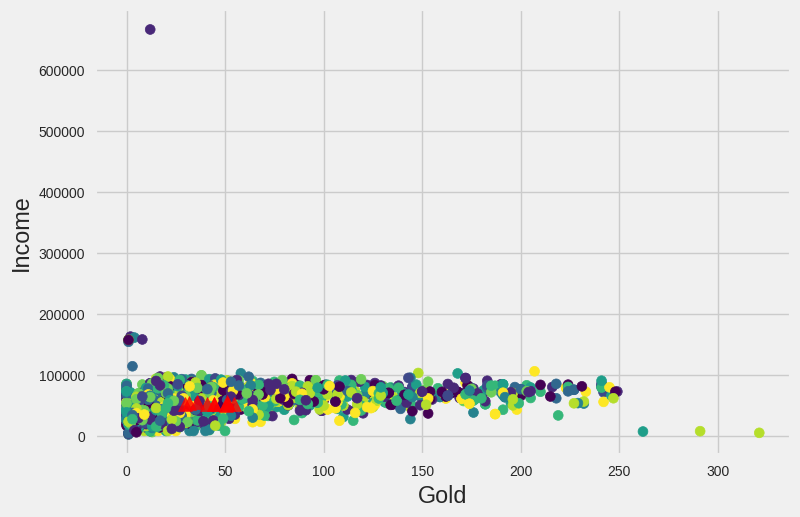

In [ ]:
plot_result(
    X = data.values,
    centers = kmeans.cluster_centers_,
    label = kmeans.labels_,
    feature_names = data.columns,
    dim1=10, dim2=1
    )

### K-Medoids

In [ ]:
!pip install scikit-learn-extra 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.8 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids

KMed = KMedoids(
    init="random",
    n_clusters=3,
    random_state=42)
KMed.fit(data.values)

KMedoids(init='random', n_clusters=3, random_state=42)

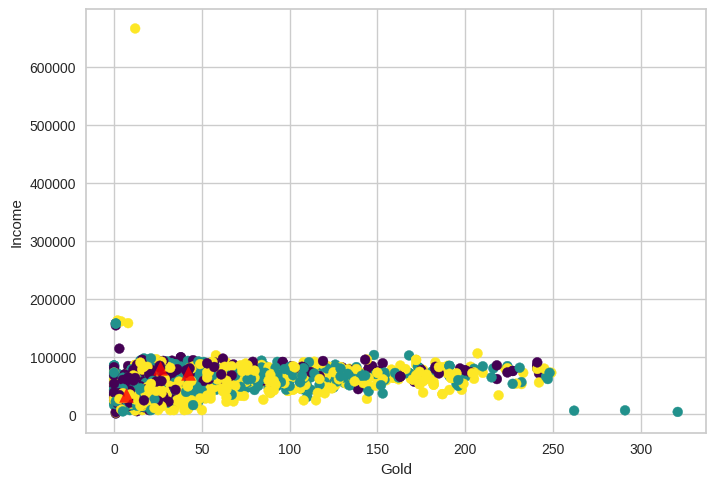

In [ ]:
plot_result(
    X = data.values,
    centers = KMed.cluster_centers_,
    label = KMed.labels_,
    feature_names = data.columns,
    dim1=10, dim2=1
    )

### elbow method

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data.values)
    sse.append(kmeans.inertia_)

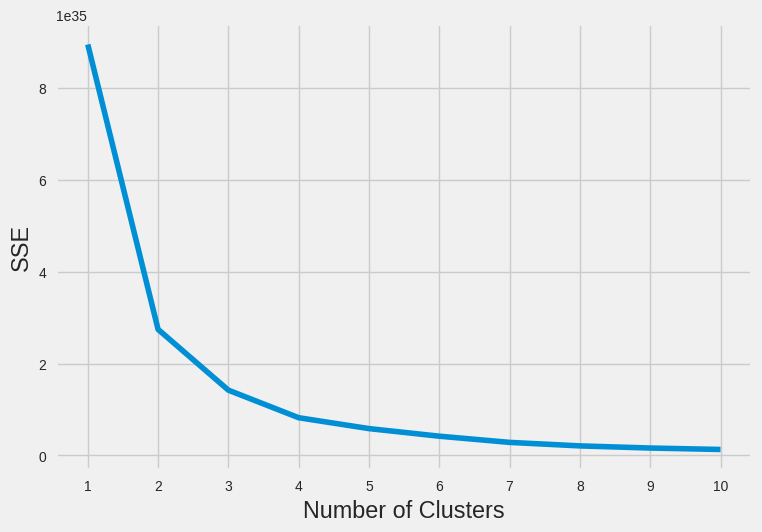

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

### silhouette coefficient

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data.values)
    score = silhouette_score(data.values, kmeans.labels_)
    silhouette_coefficients.append(score)

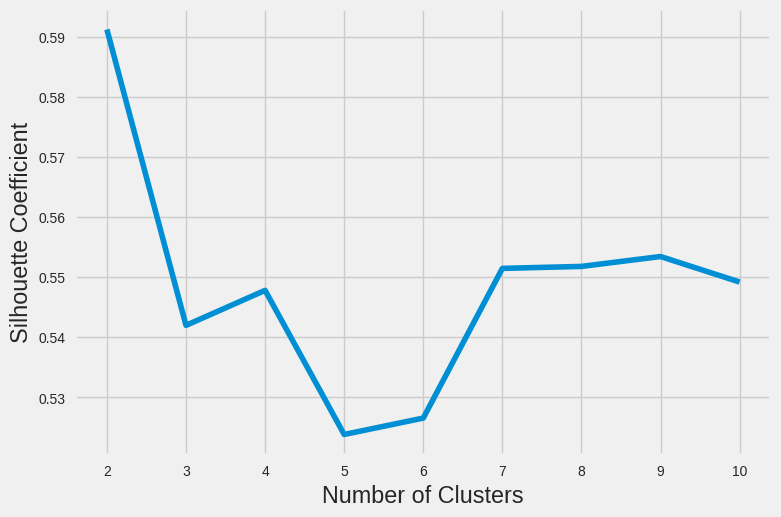

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

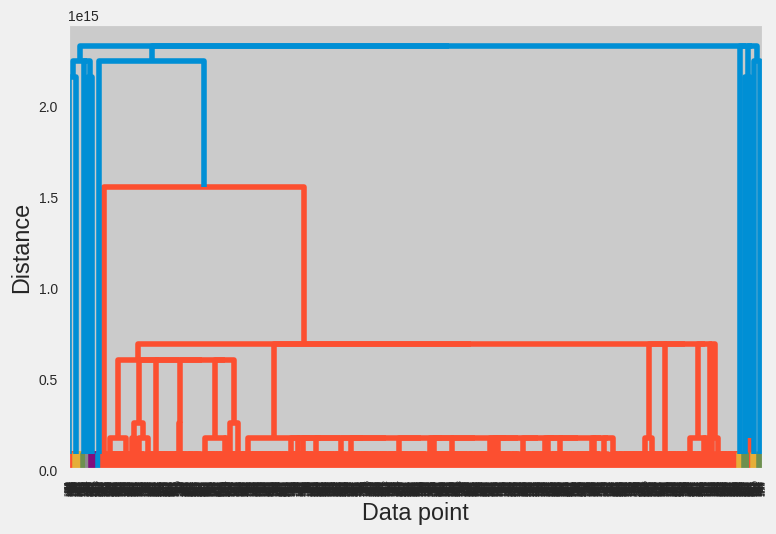

In [ ]:
plt.clf()
linkage_data = linkage(data, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel('Data point')
plt.ylabel('Distance')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

def plot_hierarchical_result(X,label, feature_names, dim1=0, dim2=1):
    plt.clf()
    plt.scatter(X[:, dim1], X[:, dim2], c=label, s=50, cmap='viridis')
    plt.xlabel(feature_names[dim1])
    plt.ylabel(feature_names[dim2])

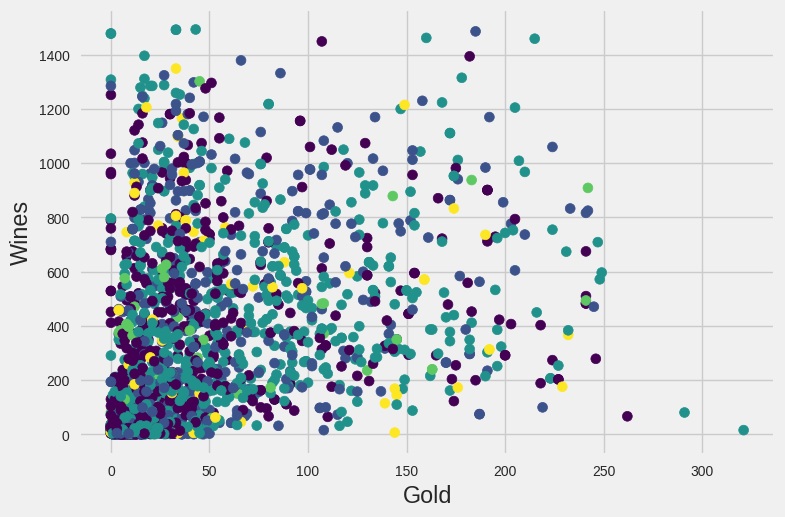

In [ ]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(data.values)

plot_hierarchical_result(data.values, clustering.labels_, data.columns, dim1=10, dim2=5) 

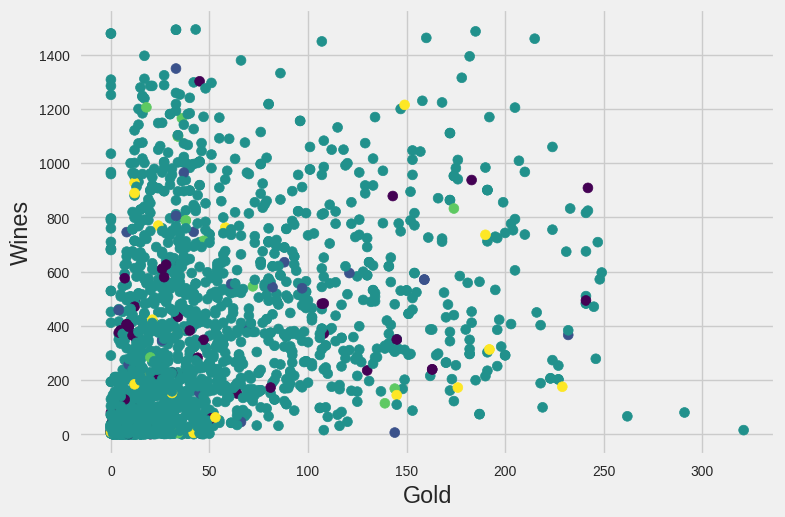

In [ ]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='single').fit(data.values)

plot_hierarchical_result(data.values, clustering.labels_, data.columns, dim1=10, dim2=5) 

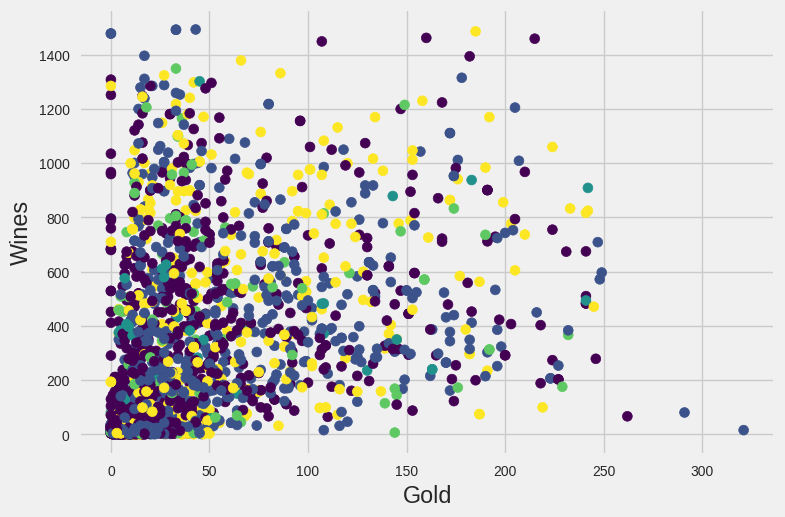

In [ ]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='average').fit(data.values)

plot_hierarchical_result(data.values, clustering.labels_, data.columns, dim1=10, dim2=5) 

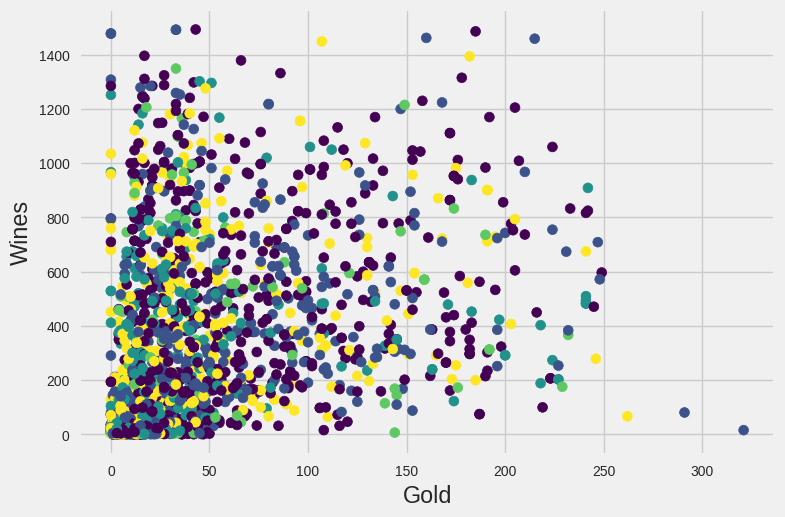

In [ ]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(data.values)

plot_hierarchical_result(data.values, clustering.labels_, data.columns, dim1=10, dim2=5) 

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

def plot_dbscan_result(X, label, feature_names, dim1=0, dim2=1):
    plt.clf()

    fig, ax = plt.subplots()

    # 畫 noise
    if -1 in label:
        ax.scatter(
            X[label == -1, dim1], 
            X[label == -1, dim2], 
            c='gray',
            label='Noise',
            marker='+',
            s=50
            )

    # 畫 group
    cl_map = plt.get_cmap('Set3') # 'viridis' 在自訂顏色時比較不明顯
    for i in set(label[label != -1]):
        ax.scatter(
            X[label == i, dim1], 
            X[label == i, dim2], 
            color=cl_map(i%12), # set3 有12 顏色可以換
            label=f'group{i}',
            s=50
            )
    ax.set_xlabel(feature_names[dim1])
    ax.set_ylabel(feature_names[dim2])

    ax.legend()
    # ax.grid(True)
    plt.show()

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=9).fit_predict(data.values)
dbscan_cluster

array([-1, -1, -1, ..., -1, -1, -1])

<Figure size 800x550 with 0 Axes>

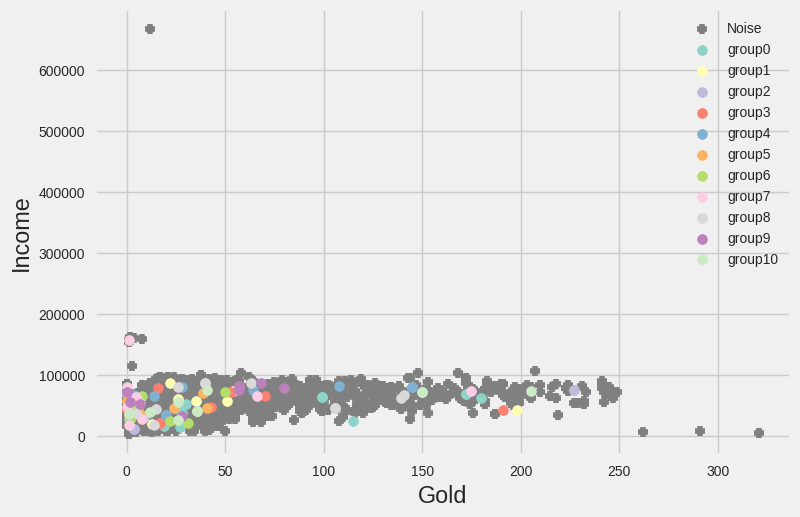

In [ ]:
plot_dbscan_result(data.values, dbscan_cluster, data.columns, dim1=10, dim2=1)

In [ ]:
from sklearn.metrics import silhouette_score

s = silhouette_score(data, kmeans.labels_, metric="euclidean")

print('silhouette score:', s)

silhouette score: 0.54916257542941
